# Variación de número de puntos, ángulos y algoritmos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from sklearn.metrics import mean_squared_error
import tomopy
dlpath = '/home/kevin/Descargas/Tesis/'

(128, 128, 128)


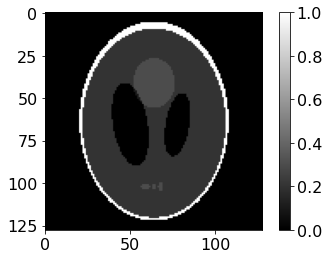

In [2]:
obj = tomopy.shepp3d() # Objeto Shepp-Logan
print(obj.shape)
plt.imshow(obj[64],cmap='gray')
#plt.title('Shepp-Logan phantom')
plt.colorbar()
#plt.savefig(dlpath+'shepp3d.svg',format='svg', bbox_inches='tight')

## Variación de algoritmos

In [4]:
algorithms = ['art', 'bart', 'fbp', 'gridrec', 'mlem', 'osem', 'ospml_hybrid', 'ospml_quad', 'pml_hybrid', 'pml_quad', 'sirt', 'tv', 'grad', 'tikh']
ang = np.linspace(0,np.pi,180) # 180 puntos uniformemente entre 0-180°
sim = tomopy.project(obj,ang,pad=False) # Obtener proyeccones del volumen en los ángulos dados
recs3 = []
import time
times = []
for i in algorithms:
    start_time = time.time()
    recs3.append(tomopy.recon(sim,ang,algorithm=i)) # Reconstrucción
    print(f'{i}: {np.round((time.time() - start_time),5)} seconds')
    times.append((time.time() - start_time))

art: 1.35945 seconds
bart: 3.85569 seconds
fbp: 3.17209 seconds
gridrec: 1.20616 seconds
mlem: 3.83082 seconds
osem: 3.65413 seconds
ospml_hybrid: 3.87309 seconds
ospml_quad: 4.52237 seconds
pml_hybrid: 5.42706 seconds
pml_quad: 4.71891 seconds
sirt: 4.47989 seconds
tv: 4.56685 seconds
grad: 4.44679 seconds
tikh: 4.4353 seconds


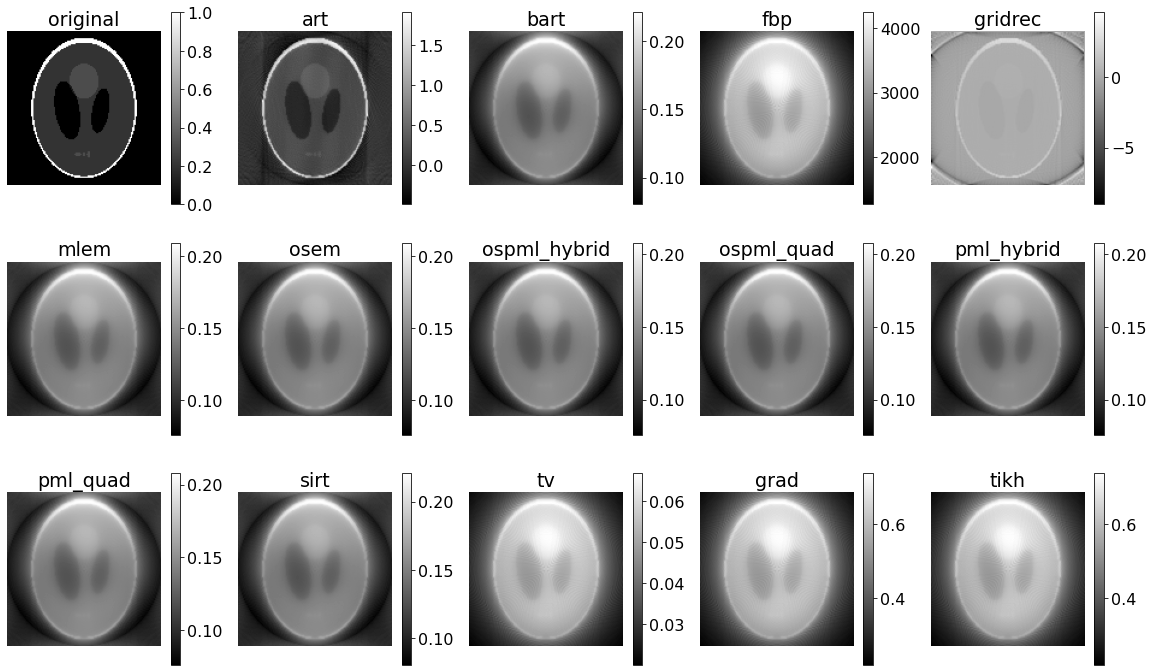

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(3,5,1)
plt.imshow(obj[64],cmap='gray')
plt.axis('off')
plt.title('original')
plt.colorbar()
for i in range(14):
    plt.subplot(3,5,i+2)
    plt.imshow(recs3[i][64],cmap='gray')
    plt.axis('off')
    plt.title(algorithms[i])
    plt.colorbar()
    #plt.clim(0,np.max(recs3[i][64]))
#plt.savefig(dlpath+'shepps3.svg',format='svg', bbox_inches='tight')

## Variación de amplitud angular con número de puntos fijo

In [15]:
n = 180 # Número de puntos
recs2 = []
for x in range(1,5):
    ang = np.linspace(0,np.pi/x,n) # Ángulos
    sim = tomopy.project(obj,ang,pad=False) # Proyecciones
    recs2.append(tomopy.recon(sim,ang,algorithm='art')) # Reconstrucción
print(recs[0].shape)

(128, 128, 128)


rmse: 0.019107449799776077
mae: 0.08689874410629272
rmse: 0.029828406870365143
mae: 0.10402260720729828
rmse: 0.03306923806667328
mae: 0.10396279394626617
rmse: 0.03430941700935364
mae: 0.10479626059532166


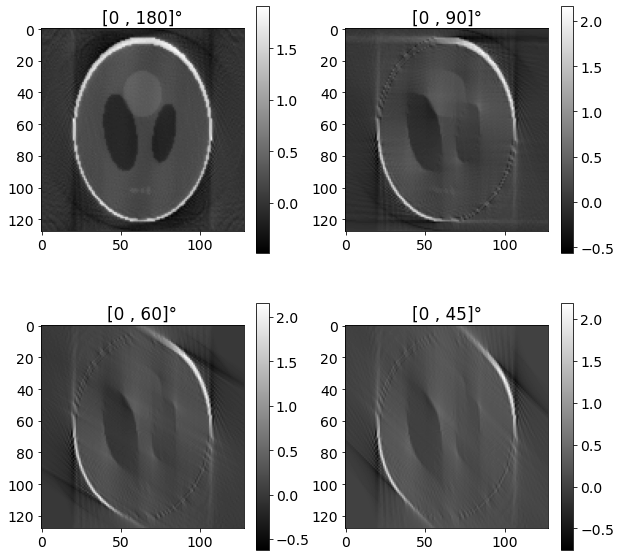

In [30]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(recs2[i][64],cmap='gray')
    print(f'rmse: {mean_squared_error(recs2[i][64],obj[64])}')
    print(f'mae: {np.mean(abs(recs2[i][64]-obj[64]))}')
    plt.title(f"[0 , {int(180/(i+1))}]°")
    plt.colorbar()
plt.savefig(dlpath+'shepps.svg',format='svg',bbox_inches='tight')

## Variación de número de puntos con amplitud angular fija

In [4]:
theta =  np.pi/1 # Amplitud angular
recs = []
for x in range(1,5):
    ang = np.linspace(0,theta,4**x) # Ángulos
    sim = tomopy.project(obj,ang,pad=False) # Proyecciones
    recs.append(tomopy.recon(sim,ang,algorithm='art')) # Reconstrucción

rmse: 0.033105507493019104
mae: 0.0989014208316803
rmse: 0.018325187265872955
mae: 0.09129409492015839
rmse: 0.01364608108997345
mae: 0.07948379218578339
rmse: 0.02145231142640114
mae: 0.08935673534870148


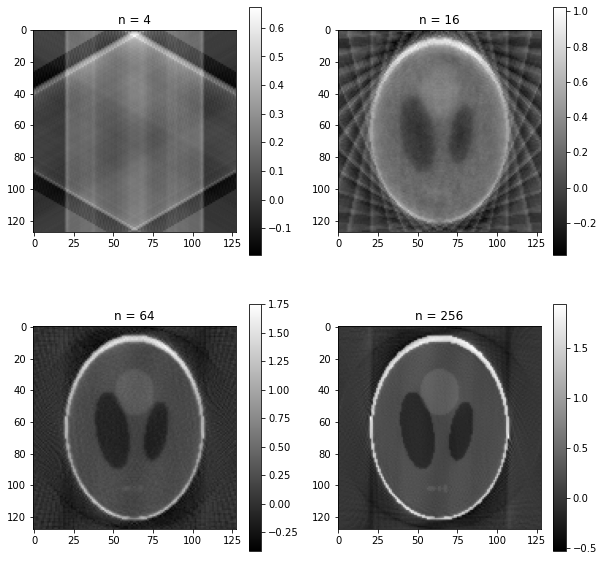

In [10]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    print(f'rmse: {mean_squared_error(recs[i][64],obj[64])}')
    print(f'mae: {np.mean(abs(recs[i][64]-obj[64]))}')
    plt.imshow(recs[i][64],cmap='gray')
    plt.title(f"n = {4**(i+1)}")
    plt.colorbar()
#plt.savefig(dlpath+'shepps2.svg',format='svg',bbox_inches='tight')

### Mínimo error (equilibrio entre resolución y exceso de magnitud)

En el resultado anterior, vemos una reconstrucción de 16 puntos más ruidosa pero con una magnitud más cercana de la original, mientras que 64 puntos tiene menos ruido pero un exceso en la magnitud. Por lo tanto, debe haber un punto medio entre ambas donde se encuentre la reconstrucción de menor error.

In [26]:
theta =  np.pi/1 # Amplitud angular
recsn = []
for x in range(16,90):
    ang = np.linspace(0,theta,x) # Ángulos
    sim = tomopy.project(obj,ang,pad=False) # Proyecciones
    recsn.append(tomopy.recon(sim,ang,algorithm='art')) # Reconstrucción

31 47


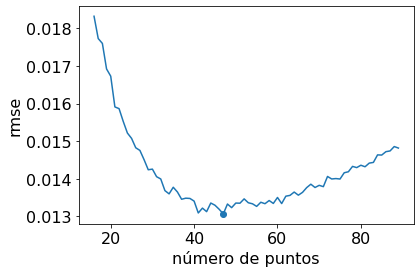

In [28]:
errors = []
for rec in recsn:
    errors.append(mean_squared_error(rec[64],obj[64])) # rmse
errmin = np.where(errors==np.min(errors))[0][0] # índice donde el error es mínimo
plt.plot(np.arange(90-16)+16,errors)
plt.scatter(errmin + 16,errors[errmin])
plt.xlabel('número de puntos')
plt.ylabel('rmse')
print(errmin,errmin+16)
plt.savefig(dlpath+'errorsn.svg',format='svg',bbox_inches='tight')

El error mínimo se obtiene con 47 puntos. Veamos el error obtenido por una reconstrucción de 180 puntos variando el número de iteraciones:

In [12]:
theta =  np.pi/1 # Amplitud angular
recsi = []
for i in range(1,31):
    ang = np.linspace(0,theta,180) # Ángulos
    sim = tomopy.project(obj,ang,pad=False) # Proyecciones
    recsi.append(tomopy.recon(sim,ang,algorithm='art',num_iter=i)) # Reconstrucción

In [13]:
erri = []
for i in range(30):
    erri.append(mean_squared_error(recsi[i][64],obj[64]))

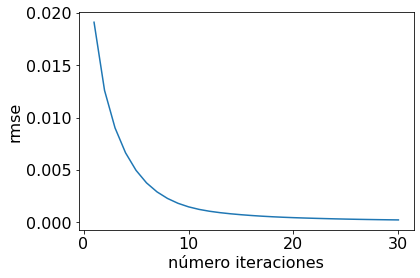

In [27]:
plt.plot(np.arange(30)+1,erri)
plt.xlabel('número iteraciones')
plt.ylabel('rmse')
#plt.savefig(dlpath+'errori180.svg',format='svg',bbox_inches='tight')

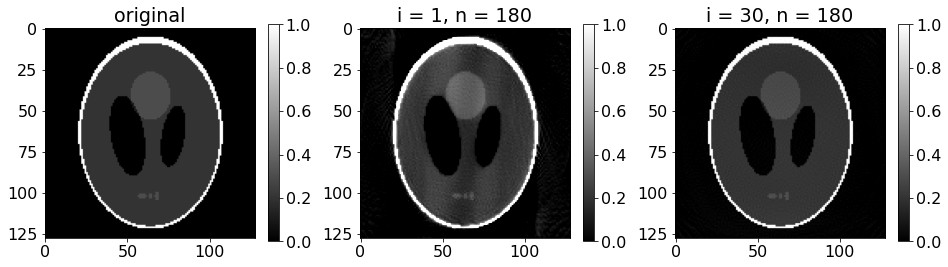

In [26]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.imshow(obj[64],cmap='gray')
plt.title('original')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(recsi[0][64],cmap='gray')
plt.title('i = 1, n = 180')
plt.colorbar()
plt.clim(0,1)
plt.subplot(1,3,3)
plt.imshow(recsi[-1][64],cmap='gray')
plt.title('i = 30, n = 180')
plt.colorbar()
plt.clim(0,1)

In [28]:
theta =  148*np.pi/180 # Amplitud angular
recsi = []
for i in range(1,31):
    ang = np.linspace(0,theta,42) # Ángulos
    sim = tomopy.project(obj,ang,pad=False) # Proyecciones
    recsi.append(tomopy.recon(sim,ang,algorithm='art',num_iter=i)) # Reconstrucción

In [29]:
erri = []
for i in range(30):
    erri.append(mean_squared_error(recsi[i][64],obj[64]))

Text(0, 0.5, 'rmse')

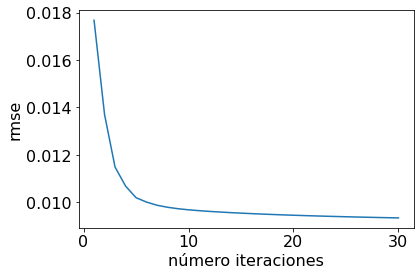

In [30]:
plt.plot(np.arange(30)+1,erri)
plt.xlabel('número iteraciones')
plt.ylabel('rmse')
#plt.savefig(dlpath+'errori180.svg',format='svg',bbox_inches='tight')

Se puede hacer ambos análisis al mismo tiempo, variando el número de puntos para encontrar el error mínimo, para diferente número de iteraciones.

In [31]:
theta =  np.pi/1 # Amplitud angular
recsni = []
for i in range(1,5):
    for x in range(40,88):
        ang = np.linspace(0,theta,x) # Ángulos
        sim = tomopy.project(obj,ang,pad=False) # Proyecciones
        recsni.append(tomopy.recon(sim,ang,algorithm='art',num_iter=i)) # Reconstrucción

(4,)
[ 7 21 35 41] [47 61 75 81]


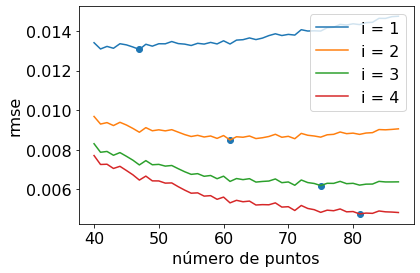

In [43]:
#plt.figure(figsize=(10,8))
errorsi = np.zeros((4,48))
minindex = []
errormin = []
for i in range(4):
    for n in range(48):
        errorsi[i,n] = mean_squared_error(recsni[n + 48*i][64],obj[64]) # rmse
    minindex.append(np.where(errorsi[i]==np.min(errorsi[i]))[0][0]) # índice donde el error es mínimo
    errormin.append(errorsi[i,minindex[i]])
minindex = np.array(minindex)
errormin = np.array(errormin)
print(errormin.shape)
plt.plot(np.arange(48)+40,errorsi.T)
plt.scatter(minindex + 40,errormin)
plt.xlabel('número de puntos')
plt.ylabel('rmse')
plt.legend([f'i = {i}' for i in np.arange(4)+1],loc='upper right')
print(minindex,minindex+40)
plt.savefig(dlpath+'errorni.svg',format='svg',bbox_inches='tight')

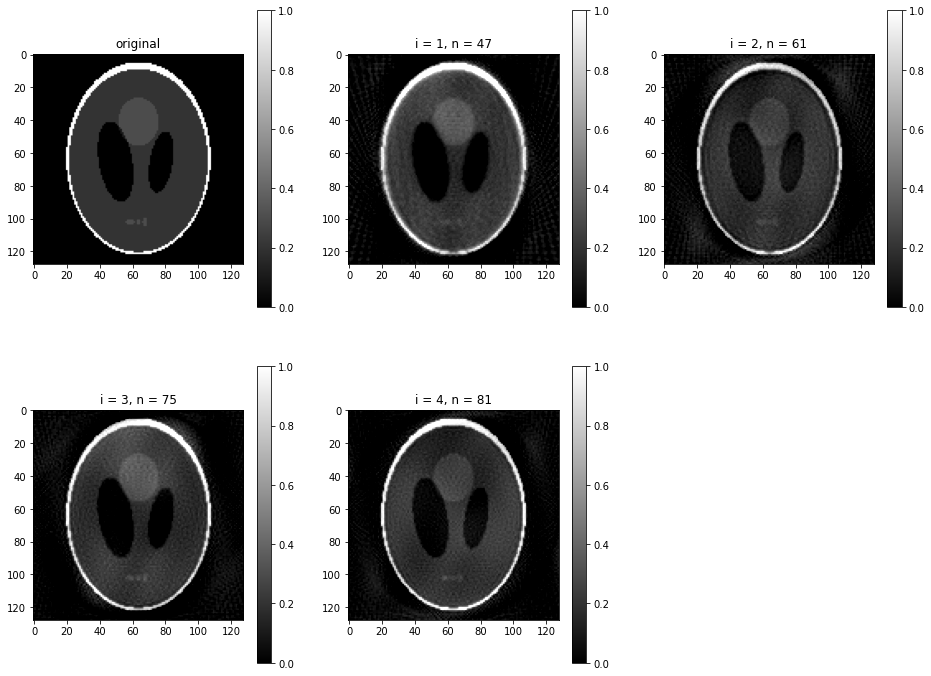

In [65]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.imshow(obj[64],cmap='gray')
plt.title('original')
plt.colorbar()
for i in range(4):
    plt.subplot(2,3,i+2)
    plt.imshow(recsni[minindex[i] + 48*i][64],cmap='gray')
    plt.title(f'i = {i+1}, n = {minindex[i]+40}')
    plt.colorbar()
    plt.clim(0,1)